#**Project 3: Airbnb Prices Prediction: A Comparative Model Evaluation**

----
##Part 2. Prices Prediction Using Regression Models
----
##Project Overview

Predicting Airbnb Prices: A Comparative Model Evaluation

In this project, we aim to evaluate the effectiveness of different regression models for predicting Airbnb property prices. We will conduct a detailed analysis, including data preprocessing and feature engineering, to prepare the dataset for modeling. Subsequently, we will train and assess five regression models: Linear Regression, Polynomial Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression. The primary objective is to determine which model demonstrates the most promising potential for accurate price predictions. The project will provide valuable insights into the applicability of these models in the context of Airbnb pricing.

----

**Implementation of the following regression models to predict Airbnb prices:**

1. Linear Regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression
5. Support Vector Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/AB_NYC_2019.csv'
df_raw = pd.read_csv(path)

Filtering the necessary columns for model training.

In [ ]:
df_final = df_raw[['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'price']]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   price                           48895 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


Checking for null values

In [ ]:
df_final.isna().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
price                                 0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputerLastReview = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = '1999-12-31')
imputerReviewsPerMonth = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)

df_raw['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])

mean_reviews_by_host = df_raw.groupby('host_id')['reviews_per_month'].mean()
missing_reviews = df_raw['reviews_per_month'].isnull()
df_raw.loc[missing_reviews, 'reviews_per_month'] = df_raw.loc[missing_reviews, 'host_id'].apply(lambda x: mean_reviews_by_host.get(x, np.nan))

imputerReviewsPerMonth = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
df_final['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])

<ipython-input-304-bb968f1eccc2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])


There are no missing values after this.

----
#**Data Splitting and Transformation**

----

Splitting the dataset into training and testing sets using sklearn library train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis = 1)
y = df_final['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
test_data = X_test.join(y_test)

In [ ]:
train_data

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,price
21838,Manhattan,40.72208,-73.98109,Private room,1,116,4.07,2,73
47539,Manhattan,40.72206,-73.99695,Entire home/apt,4,0,0.00,1,189
25386,Staten Island,40.59546,-74.06092,Entire home/apt,7,0,0.00,3,800
24173,Manhattan,40.77854,-73.94984,Entire home/apt,31,7,0.30,33,265
27875,Brooklyn,40.69854,-73.94069,Private room,2,4,0.21,1,50
...,...,...,...,...,...,...,...,...,...
43723,Manhattan,40.80037,-73.95940,Private room,30,0,0.00,32,60
32511,Manhattan,40.73308,-74.00456,Entire home/apt,2,4,0.30,1,157
5192,Brooklyn,40.71623,-73.96415,Private room,1,78,1.31,1,115
12172,Brooklyn,40.68460,-73.96536,Entire home/apt,2,84,2.03,1,330


The histograms provide a visual representation of the data distribution for each feature in the dataset. This is important to identify any potential outliers, skewness, or patterns in the data. For example, it helps in recognizing if there are extreme values in any of the features (e.g., prices) and whether the data is normally distributed.

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

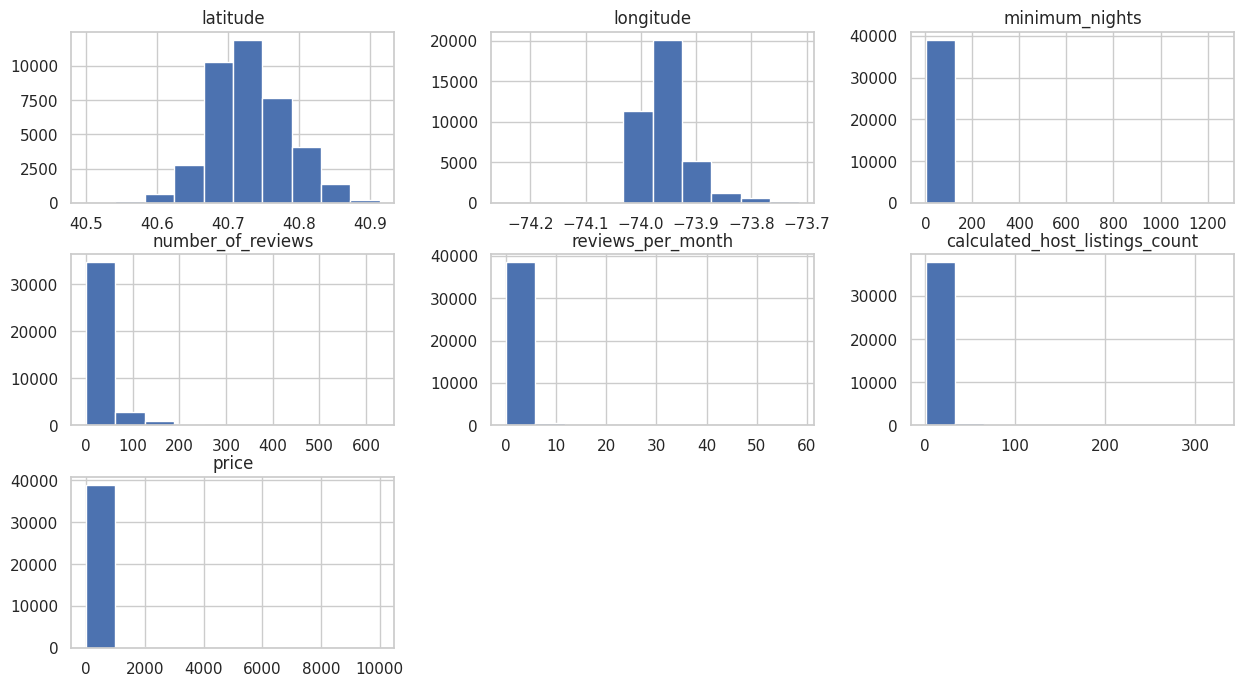

In [ ]:
train_data.hist(figsize = (15,8))

 The heatmap visualizes the correlation between different features. In this project, it can help identify which features are more or less correlated with the target variable, 'price'. For instance, it can show if variables like 'latitude' or 'longitude' have a strong impact on the price. This information is valuable for feature selection and model building.

<ipython-input-311-264c52c800df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

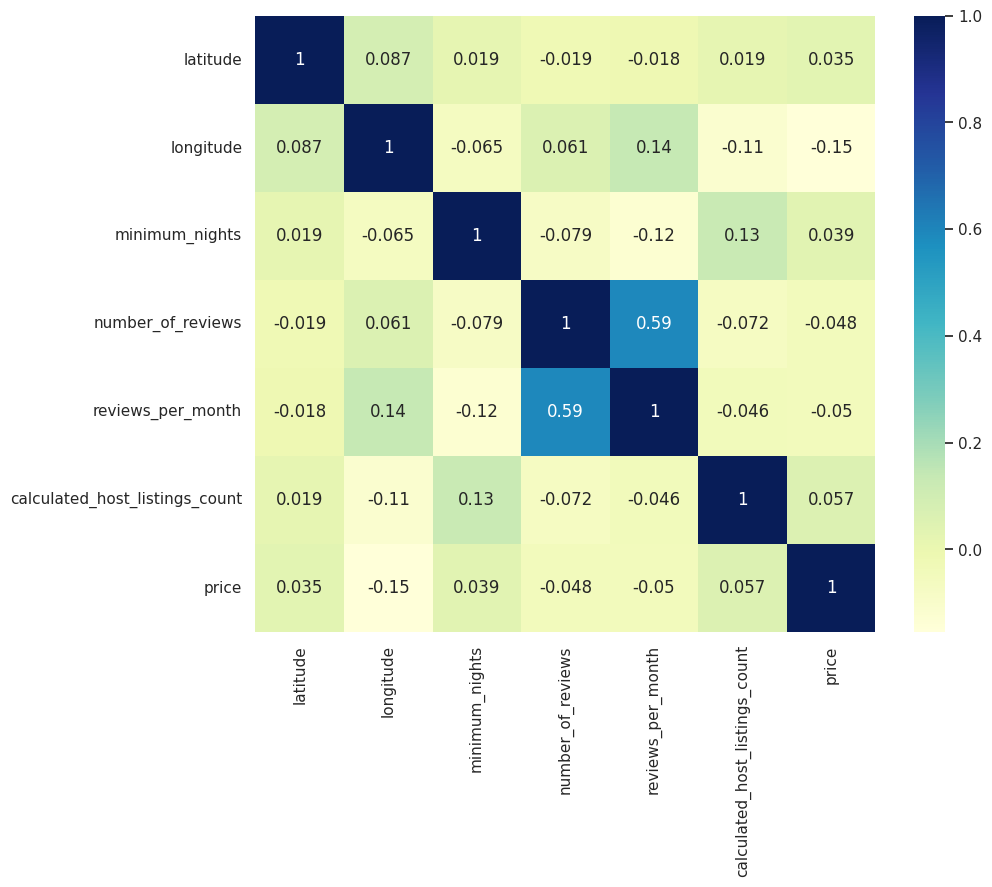

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
train_data.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'price'],
      dtype='object')

----
#**Enhance the performance and stability of machine learning models**

----

The logarithmic transformation is applied to certain columns to:

1. **'minimum_nights'**: Make the scale of the feature more consistent and reduce the impact of extreme values.
2. **'number_of_reviews'**: Normalize the range of values in this column.
3. **'reviews_per_month'**: Handle zero or very small values and make the distribution more suitable for modeling.
4. **'calculated_host_listings_count'**: Stabilize and scale the data for better model performance.


In [ ]:
train_data['minimum_nights'] = np.log(train_data['minimum_nights'] + 1)
train_data['number_of_reviews'] = np.log(train_data['number_of_reviews'] + 1)
train_data['reviews_per_month'] = np.log(train_data['reviews_per_month'] + 1)
train_data['calculated_host_listings_count'] = np.log(train_data['calculated_host_listings_count'] + 1)

In [ ]:
test_data['minimum_nights'] = np.log(test_data['minimum_nights'] + 1)
test_data['number_of_reviews'] = np.log(test_data['number_of_reviews'] + 1)
test_data['reviews_per_month'] = np.log(test_data['reviews_per_month'] + 1)
test_data['calculated_host_listings_count'] = np.log(test_data['calculated_host_listings_count'] + 1)

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

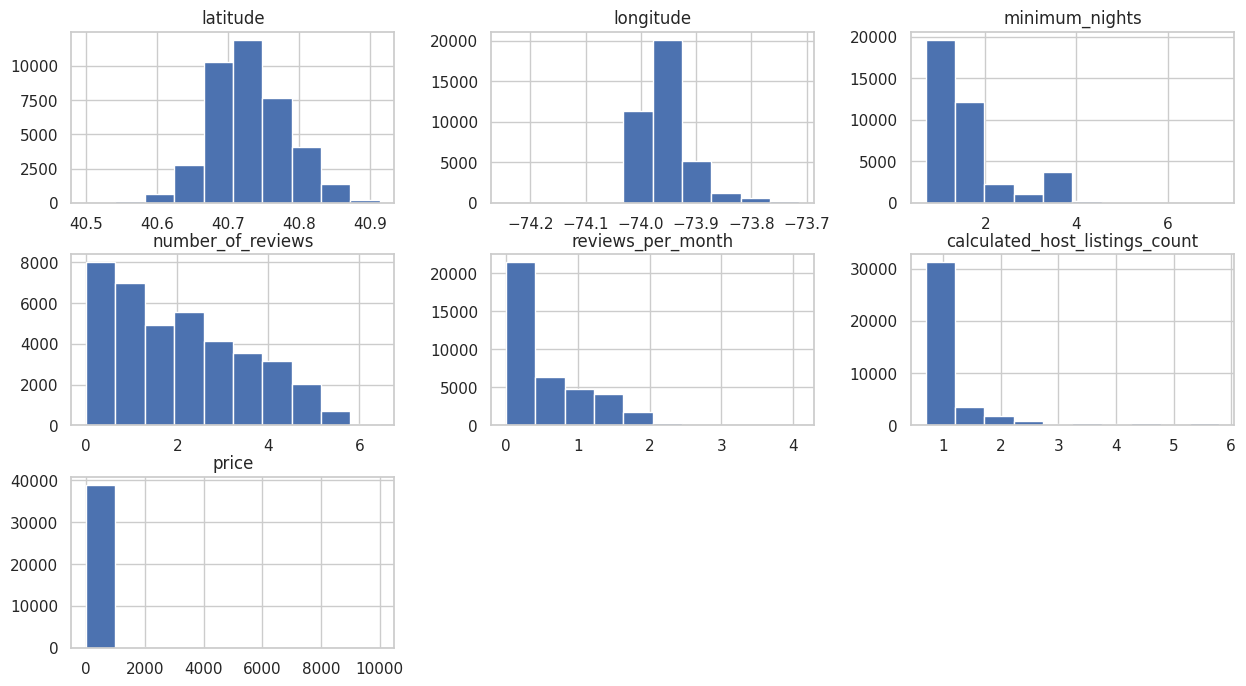

In [ ]:
train_data.hist(figsize = (15,8))

----
#**Encoding Categorical Variables**

----

For each of the categorical columns 'neighbourhood_group' and 'room_type' in both the training and test datasets, one-hot encoding is applied using pd.get_dummies. This creates a binary column for each unique category within these columns.

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['neighbourhood_group'])).drop(['neighbourhood_group'], axis = 1)

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['room_type'])).drop(['room_type'], axis = 1)

In [ ]:
test_data = test_data.join(pd.get_dummies(test_data['neighbourhood_group'])).drop(['neighbourhood_group'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data['room_type'])).drop(['room_type'], axis = 1)

HeatMap Visualization to see the correlation between feature and target(price)

<Axes: >

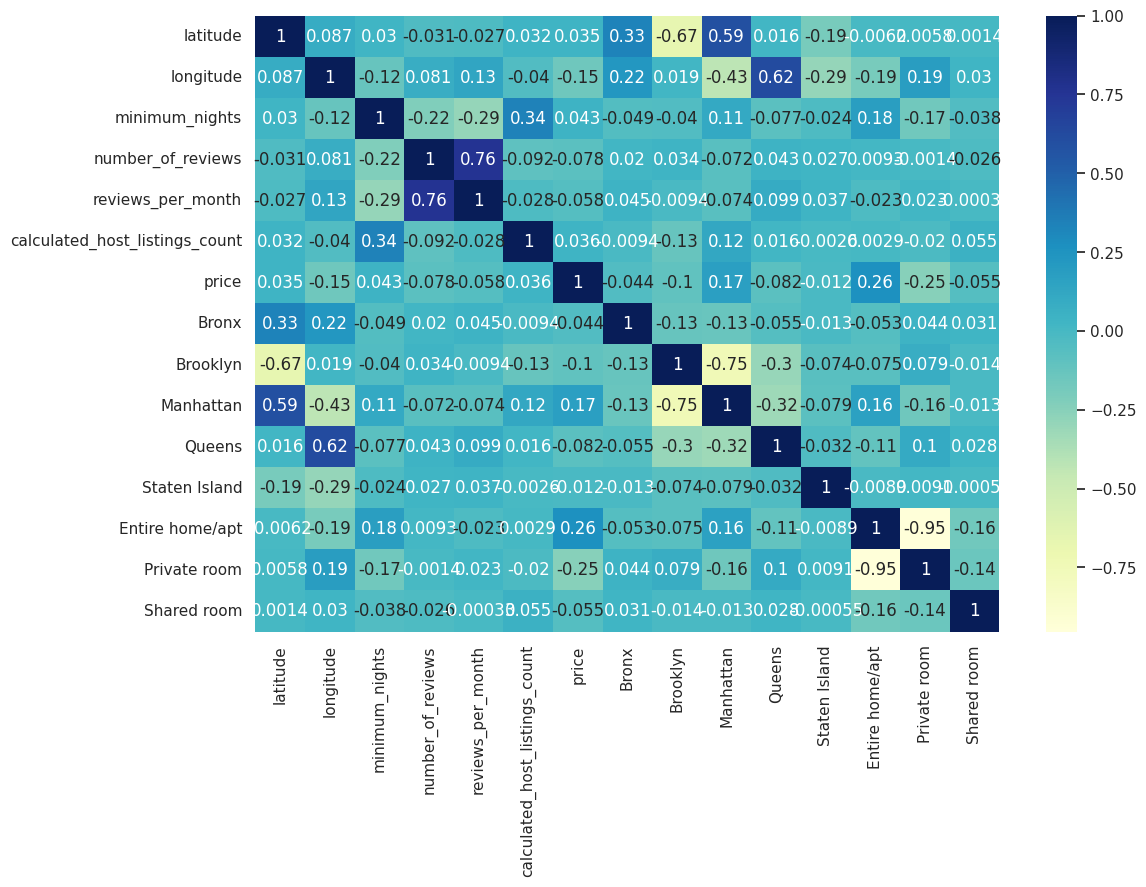

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

----
#**Feature Scaling**

----

In [ ]:
train_data.head(3)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
21838,40.72208,-73.98109,0.693147,4.762174,1.623341,1.098612,73,0,0,1,0,0,0,1,0
47539,40.72206,-73.99695,1.609438,0.000000,0.000000,0.693147,189,0,0,1,0,0,1,0,0
25386,40.59546,-74.06092,2.079442,0.000000,0.000000,1.386294,800,0,0,0,0,1,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop('price', axis = 1))
X_test = scaler.transform(test_data.drop('price', axis = 1))

In [ ]:
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

In [ ]:
X_train.head(5)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
21838,40.72208,-73.98109,0.693147,4.762174,1.623341,1.098612,0,0,1,0,0,0,1,0
47539,40.72206,-73.99695,1.609438,0.000000,0.000000,0.693147,0,0,1,0,0,1,0,0
25386,40.59546,-74.06092,2.079442,0.000000,0.000000,1.386294,0,0,0,0,1,1,0,0
24173,40.77854,-73.94984,3.465736,2.079442,0.262364,3.526361,0,0,1,0,0,1,0,0
27875,40.69854,-73.94069,1.098612,1.609438,0.190620,0.693147,0,1,0,0,0,0,1,0


----
#**Linear Regression**

----

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_prediction = reg.predict(X_test)

In [ ]:
df_linearreg_comparison = pd.DataFrame({'Actual': y_test,'Linear Prediction': linear_prediction})

In [ ]:
print(df_linearreg_comparison.head(7))
print()
print(df_linearreg_comparison.tail(7))

       Actual  Linear Prediction
18907      60          83.651974
46663     250         207.993041
19757      80          64.809168
9705       95          41.558887
3322      450         244.750631
12637     300         171.082929
19383      90         170.189962

       Actual  Linear Prediction
4224      142         168.437459
37131     128         188.384670
6860       40          37.182932
42977     150         175.896518
408        50          42.513729
6778      105         145.478589
35869      50          77.887146


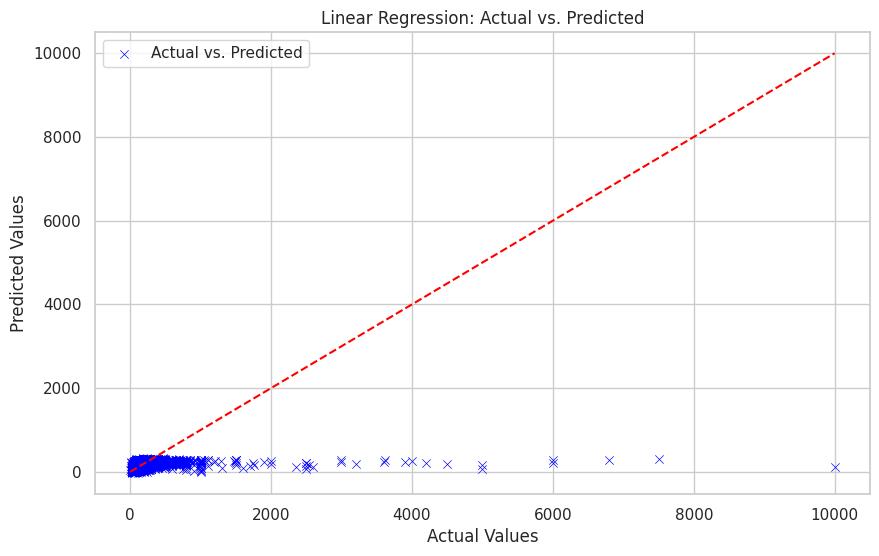

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Linear Prediction', data=df_linearreg_comparison, color='blue', marker='x', label='Actual vs. Predicted')
plt.plot([min(df_linearreg_comparison['Actual']), max(df_linearreg_comparison['Actual'])], [min(df_linearreg_comparison['Actual']), max(df_linearreg_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')


plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


In [ ]:
reg.score(X_test, y_test)         #->>> 0.07431971002268967

0.07431971002268967

**The Linear Regression model has an R-squared score of 0.07431971002268967
, indicating its limited ability to predict 'price' from the available features. This low score suggests that only a small fraction of the price variance is explained by these features, making the model less effective for price prediction. Exploring other regression methods or enhancing feature engineering may be necessary for improving predictive accuracy.**

----
#**Polynomial Regression**

----

Polynomial Regression with a degree of 3 is employed to model the relationship between the predictor variables and the 'price.'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial of degree 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polyreg = LinearRegression()

polyreg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
polynomial_pred = polyreg.predict(X_test_poly)

In [ ]:
# Actual -> y_test
# Predicted -> polynomial_pred

df_polynomial_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': polynomial_pred})
df_polynomial_comparison.sort_values(by = 'Predicted', ascending = False)

,Actual,Predicted
38010,179,900.905223
42780,261,748.584910
47982,350,733.332957
41215,1494,712.578074
48151,89,698.379832
...,...,...
7134,38,-60.074269
35231,40,-72.565480
44777,65,-99.100636
42699,35,-123.288136


The scatterplot displays how well the model's predictions align with actual values. The red dashed line represents perfect predictions, which the model approximates to some extent.

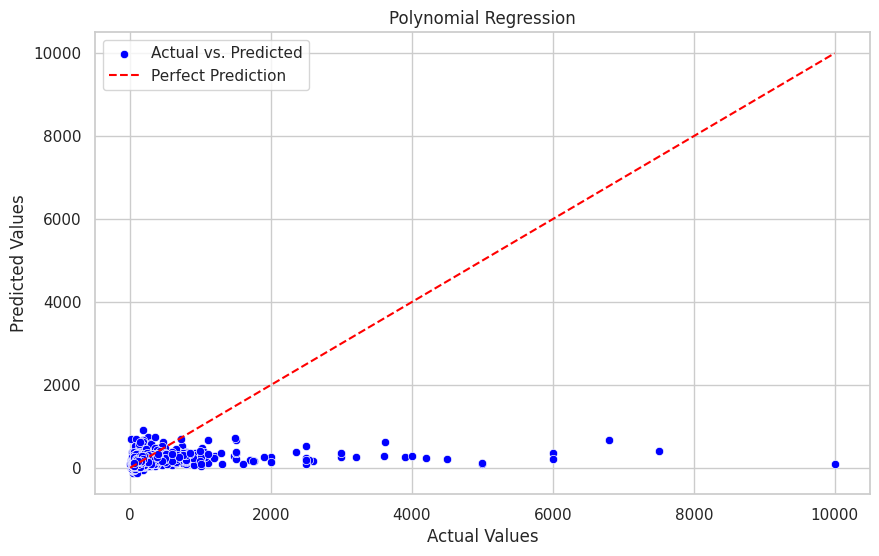

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=df_polynomial_comparison, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(df_polynomial_comparison['Actual']), max(df_polynomial_comparison['Actual'])], [min(df_polynomial_comparison['Actual']), max(df_polynomial_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()

plt.show()

In [ ]:
polyreg.score(X_test_poly, y_test)         #->>> 0.09757296456371589

0.09757296456371589

**The Polynomial Regression model's R-squared score is 0.09757296456371589
, indicating a slightly better fit than linear regression. It suggests that the polynomial features help explain a bit more of the 'price' variance. However, the predictive accuracy is still limited.**

----
#**Decision Tree Regression**

----

In the Decision Tree Regression model, a tree with a maximum depth of 4 is constructed to predict the 'price.'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decisionTree_regressor = DecisionTreeRegressor(max_depth=4)

decisionTree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
decisionTree_Prediction = decisionTree_regressor.predict(X_test)

In [ ]:
df_decisionTree_Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': decisionTree_Prediction})

In [ ]:
df_decisionTree_Comparison

,Actual,Predicted
18907,60,66.733219
46663,250,140.004124
19757,80,98.926457
9705,95,82.100226
3322,450,251.103476
...,...,...
6860,40,66.733219
42977,150,183.545275
408,50,82.100226
6778,105,140.004124


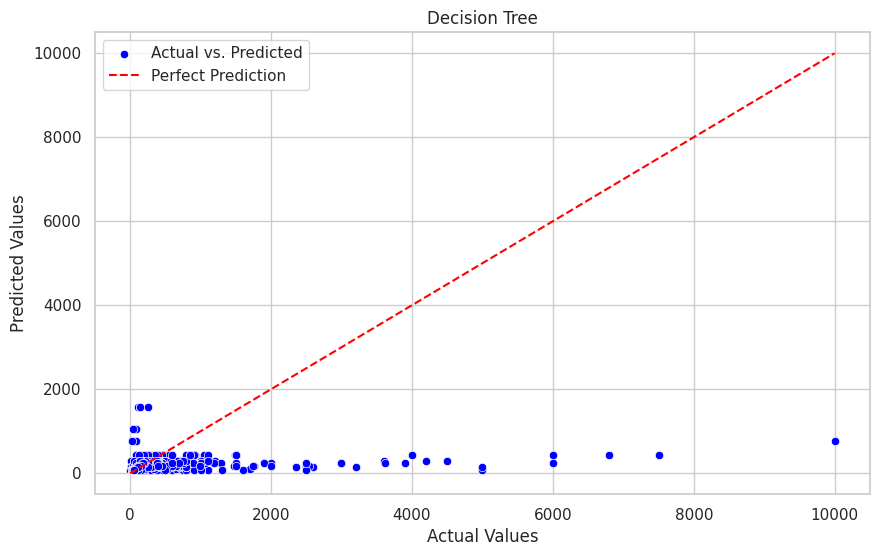

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=df_decisionTree_Comparison, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(df_decisionTree_Comparison['Actual']), max(df_decisionTree_Comparison['Actual'])], [min(df_decisionTree_Comparison['Actual']), max(df_decisionTree_Comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.legend()

plt.show()


In [ ]:
decisionTree_regressor.score(X_test, y_test)    # --> -0.06863474960512006

0.087603674922487

**The Decision Tree Regression model's R-squared score is -0.06863474960512006, suggesting limited predictive accuracy. While the model captures some patterns, it does not perform well in predicting the 'price.'**


----
#**Random Forest Regression**

----

In the Random Forest Regression model, an ensemble of 8 decision trees is utilized with a fixed random state of 5.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators= 8, random_state = 5)
randomForest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=8, random_state=5)

In [ ]:
randomForest_prediction = randomForest.predict(X_test)

In [ ]:
print(randomForest_prediction)

[100.25  132.25  104.875 ...  54.75  121.125  39.25 ]


In [ ]:
df_randomForest_comparison = pd.DataFrame({'Actual': y_test, 'RandomForest_Prediction':randomForest_prediction})

In [ ]:
df_randomForest_comparison.head(5)

,Actual,RandomForest_Prediction
18907,60,100.250
46663,250,132.250
19757,80,104.875
9705,95,92.375
3322,450,266.625


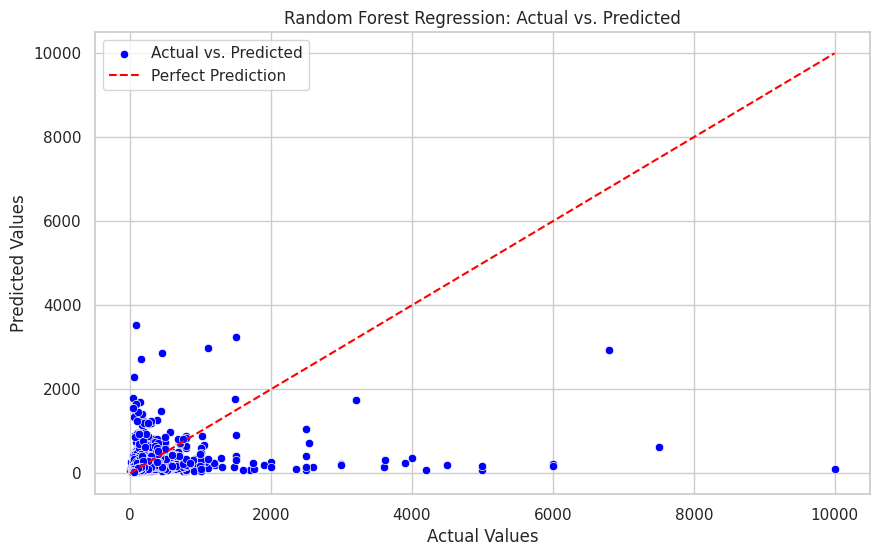

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='RandomForest_Prediction', data=df_randomForest_comparison, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(df_randomForest_comparison['Actual']), max(df_randomForest_comparison['Actual'])], [min(df_randomForest_comparison['Actual']), max(df_randomForest_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Random Forest Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.legend()

plt.show()


In [ ]:
randomForest.score(X_test, y_test)          # ->> 0.010620181270641349

0.010620181270641349

The model's R-squared score is approximately 0.0106, indicating limited predictive performance.

 The predictions show minimal alignment with the actual values, suggesting that the model has limited effectiveness in predicting the target variable.

----
#**Support Vector Regression**

----

In the Support Vector Regression (SVR) model, the features are standardized using a StandardScaler.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features
vectorScaler = StandardScaler()
X_train_scaled = vectorScaler.fit_transform(X_train)
X_test_scaled = vectorScaler.transform(X_test)

 The SVR model employs a linear kernel with a cost (C) parameter set to 1.0, which can be adjusted as needed.

In [ ]:
# Create a Support Vector Regression (SVR) model
vectorModel = SVR(kernel='linear', C=1.0)  # You can change the kernel and C parameter as needed

# Fit the model to the training data
vectorModel.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
# Prediction on scaled Test Data
vectorPrediction = vectorModel.predict(X_test_scaled)

In [ ]:
df_vector_comparison = pd.DataFrame({'Actual': y_test, 'Vector_Prediction':vectorPrediction})

In [ ]:
df_vector_comparison.head(5)

,Actual,Vector_Prediction
18907,60,60.199652
46663,250,152.068750
19757,80,68.687263
9705,95,61.236502
3322,450,185.854506


 The scatterplot illustrates the comparison between the model's predictions (represented by blue markers) and the actual values, with a red dashed line indicating a perfect prediction.

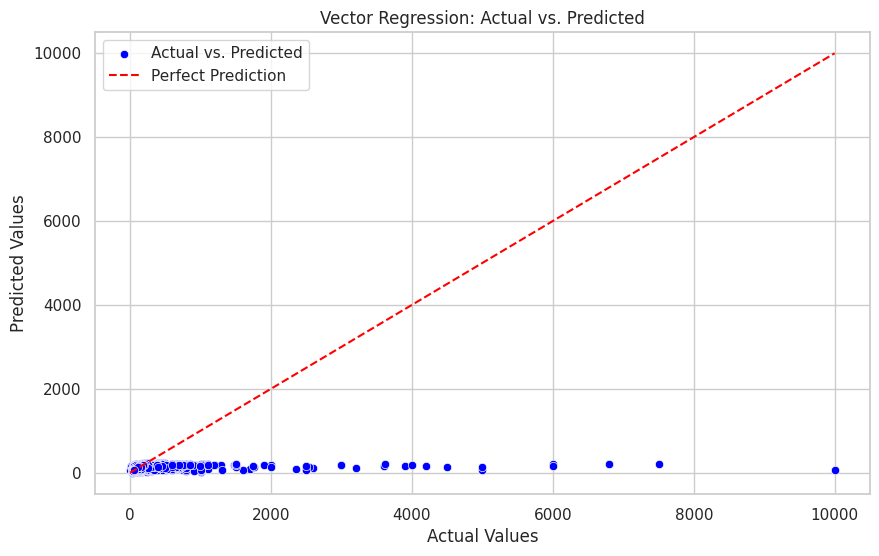

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Vector_Prediction', data=df_vector_comparison, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(df_vector_comparison['Actual']), max(df_vector_comparison['Actual'])], [min(df_vector_comparison['Actual']), max(df_vector_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Vector Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.legend()

plt.show()


In [ ]:
vectorModel.score(X_test,y_test)      # ->>> -5.161462208057092

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


-5.161462208057092

The model's score is approximately -5.1615, indicating poor predictive performance.

**The predictions deviate significantly from the actual values, highlighting the model's limitations in predicting the target variable.**

----
#**Conclusion**

----

1. Linear Regression:

 - R-squared score: 0.0743.
 - Limited ability to predict prices due to a low score.

2. Polynomial Regression:

 - R-squared score: 0.0976.
 - Slightly better fit than linear regression but still limited in predictive accuracy.

3. Decision Tree Regression:

 - R-squared score: -0.0686.
 - Limited predictive accuracy, with the model struggling to predict prices effectively.

4. Random Forest Regression:

 - R-squared score: 0.0106.
 - Minimal alignment between predictions and actual values, indicating limited effectiveness in price prediction.

5. Support Vector Regression:

 - R-squared score: -5.1615.
 - Poor predictive performance, with significant deviations between predictions and actual values.

**The project aimed to assess the applicability of different regression models for forecasting Airbnb prices using property listing attributes. The outcomes suggest that the models exhibit constrained predictive performance. Consequently, future enhancements in model refinement and feature engineering are likely imperative to enhance predictive accuracy.**